Александр, рад приветствовать тебя на финальном проекте)

На связи твой тимлид Александр Дьяченко, думаю ты уже знаешь правила, но я повторю.  
Предлагаю общаться на "ты", если это для тебя приемлемо)  

В твоей работе я оставлю некоторые комментарии, которые помогут лучше понять материал или скажу, что все сделано верно.  
Давай договоримся об условных обозначениях, чтобы наше общение было эффективнее:  

Комментарии будут в <font color='green'>зеленой ✔️</font>, <font color='orange'>оранжевой ⚠️</font> или <font color='red'>красной ❌</font> рамках:


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Зеленым цветом помечены образцовые решения. Которые можно использовать в дальнейшем.
    
</div>

<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
    
</div>

<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью.
    
</div>

-------------------

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Свои комментарии и вопросы ты можешь оставлять в синей рамочке. Также используй её, если что-то исправил, доделал или полностью переписал.</div>




Старайся отвечать на мои рекомендации и не удалять комментарии, так получится проверить работу быстрее)

Погнали!



-------

# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Хорошее введение, молодец!
    
</div>


# Импорты + константы

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import pprint

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

SEED = 261222
CUR_DATE = dt(2020,2,1)

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Константы заглавными, импорты отдельно, все как положено)
    
</div>


# Первая часть

## Загрузка данных

In [40]:
try:
    path = 'final_provider/final_provider/'
    contract_df = pd.read_csv(path + 'contract.csv')
    personal_df = pd.read_csv(path + 'personal.csv')
    internet_df = pd.read_csv(path + 'internet.csv')
    phone_df = pd.read_csv(path + 'phone.csv')
except:
    path = '/datasets/final_provider/'
    contract_df = pd.read_csv(path + 'contract.csv')
    personal_df = pd.read_csv(path + 'personal.csv')
    internet_df = pd.read_csv(path + 'internet.csv')
    phone_df = pd.read_csv(path + 'phone.csv')

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Отлично, данные на базе, идем дальше!)
    
</div>


### Contract

In [41]:
display(contract_df.describe())
display(contract_df.drop('MonthlyCharges', 'columns').describe())
contract_df.info()
display(contract_df.head())

MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000

C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\3045709437.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  display(contract_df.drop('MonthlyCharges', 'columns').describe())


customerID   BeginDate EndDate            Type PaperlessBilling  \
count         7043        7043    7043            7043             7043   
unique        7043          77       5               3                2   
top     7590-VHVEG  2014-02-01      No  Month-to-month              Yes   
freq             1         366    5174            3875             4171   

           PaymentMethod TotalCharges  
count               7043         7043  
unique                 4         6531  
top     Electronic check               
freq                2365           11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65

Посмотрю на распределение ежемесячных счетов

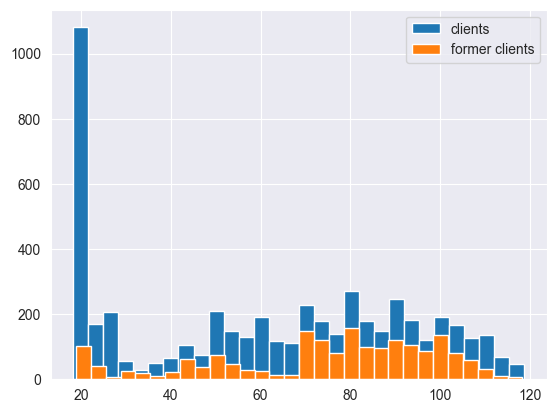

In [42]:
plt.hist(
    contract_df[contract_df['EndDate']=='No']['MonthlyCharges'],
    bins=30,
    label='clients')
plt.hist(
    contract_df[contract_df['EndDate']!='No']['MonthlyCharges'],
    bins=30,
    label='former clients')

plt.legend()
plt.show()

В первую очередь видно, что подовляющее большинство предпочитает дешевые тарифы и платит до ~20. Однако среди тех, кто перестал быть клиентов, таких намного меньше. Значит нужно будет в первую очередь ориентировать на тех, у кого высокие ежемесячные счета (>70).

Далее следует небольшая просадка в ценовом диапазоне 20-70, после чего видно увеличение кол-ва плетельщиком с 70 до 100, дальше резкое падение до 120.

Также можно отметить небольшие пики на круглых значениях.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Интересные наблюдения) Также молодец, что вывел обе группы на плоскости одного графика, удобно сравнивать
    
</div>


### Personal

In [43]:
display(personal_df.describe())
display(personal_df.drop('SeniorCitizen', 'columns').describe())
personal_df.info()
display(personal_df.head())

SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\3072237980.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  display(personal_df.drop('SeniorCitizen', 'columns').describe())


customerID gender Partner Dependents
count         7043   7043    7043       7043
unique        7043      2       2          2
top     7590-VHVEG   Male      No         No
freq             1   3555    3641       4933

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

Разделение по полу примеро 50/50, как и по наличию партнера. У большинства есть зависимые от них люди и, около 16% являются пенсионерами.

### Internet

In [44]:
display(internet_df.describe())
internet_df.info()
display(internet_df.head())

customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

Большинство наших пользователей пользуются интернетом. Отдельные услуги использует от половины до ~2\3 пользователей интернета. Самые популярные - безопасность и тех поддержка, а самые непопулярные связаны сос тримингом. 

### Phone

In [45]:
display(phone_df.describe())
phone_df.info()
display(phone_df.head())

customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Сервисом стационарного телефона пользуются ~90% пользователей. Чуть меньше, чем у половины подключено несколько линий.

Ни в одном из датафреймов я не увидел явных пропусков или дубликатов. Однако не все пользуются интернетом или телефоном, после объединения надо будет проверить, что не осталось пользователей, которые ничем не пользуются, иначе их удалить.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
По остальным датасетам также все хорошо. Ознакомились со всеми данными и теперь будет проще составлять план)
    
</div>


## План работы

1. Предобработка данных

    a. По customerID объединю все датафреймы
    
    b. Преобразую BeginDate и EndDate в формат datetime
    
    c. Добавлю колонку с количеством дней, в течении которых человек являлся клиентом
    
    d. Приведу TotalCharges к цифровому значению.
    
    e. Добавлю колонку, которая будет отражать целевое значение


2. Сделаю дополнительный исследовательский анализ на объединенном датафрейме


3. 25% данных выделю для тестовой выборки


4. Для тех моделей, где это актуально, закодирую данные


5. Обучу модель с использованием кросс-валидации, попробую следующие варианты:

    a. LogisticRegression
    
    b. DecisionTreeClassifier
    
    c. RandomForestClassifier
    
    d. lightGBM
    
    
6. Выберу модель с наилучшим AUC-ROC и сделаю вывод с рекомендацией исходя из результатов обучения.


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
7. Отчет)
    
</div>


## Вопросы

Вопросов нет

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий тимлида ✔️</b>
       
В таком случае ты можешь приступать ко второму этапу работы) Первую часть принимаю!  
    
----  
    
Напоминаю, что все этапы работы мы делаем в одной тетрадке, как бы наращивая проект)
    
</div>


# Подготовка модели

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Комментарии ко второй части будут с таким заголовком)
    
</div>


## Предобработка данных

Создам единый датафрейм

In [46]:
full_data = contract_df.merge(personal_df, left_on='customerID', right_on='customerID', how='outer')
full_data = full_data.merge(internet_df, left_on='customerID', right_on='customerID', how='outer')
full_data = full_data.merge(phone_df, left_on='customerID', right_on='customerID', how='outer')


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий тимлида V2 ❌</b>
       
Неверно объединены таблички, потеряли много данных, тебе подoйдет способ объединения left (если правильно все сделать) или outer. Если способ не указывается, то merge по дефолту использует inner
    
</div>

<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
Точно, забыл про это, добавил "how='outer'".
    
</div>


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2.2 ✔️</b>
       
Отлично!
    
</div>


In [47]:
full_data.info()
display(full_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0  Female              0     Yes         No             DSL             No   
1    Male              0      No         No             DSL            Yes   
2    Male              0      No         No             DSL            Yes   
3    Male              0      No         No             DSL            Yes   
4  Female              0      No         No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

  MultipleLines  
0           NaN  
1            No  
2            No  
3           NaN  
4            No

In [48]:
full_data[full_data['BeginDate'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      object 
 1   BeginDate         0 non-null      object 
 2   EndDate           0 non-null      object 
 3   Type              0 non-null      object 
 4   PaperlessBilling  0 non-null      object 
 5   PaymentMethod     0 non-null      object 
 6   MonthlyCharges    0 non-null      float64
 7   TotalCharges      0 non-null      object 
 8   gender            0 non-null      object 
 9   SeniorCitizen     0 non-null      int64  
 10  Partner           0 non-null      object 
 11  Dependents        0 non-null      object 
 12  InternetService   0 non-null      object 
 13  OnlineSecurity    0 non-null      object 
 14  OnlineBackup      0 non-null      object 
 15  DeviceProtection  0 non-null      object 
 16  TechSupport       0 non-null      object 
 17  Streaming

<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
В основной таблице и таблице персональных данных пропусков нет, они есть только в таблице относительно телефона и интернета. Скорее всего это связано с тем, что не все люди полььзуются телефон/интернетом нашей компании, в таких записях заменю пропуски на "Not used".
    
</div>


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2.2 ✔️</b>
       
Принято)
    
</div>



In [49]:
full_data = full_data.fillna('Not used')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


Преобразую BeginDate и EndDate в дату. Строки с 'No' в EndDate заменю на NA

In [50]:
full_data['EndDate'] = full_data['EndDate'].replace('No', '1970-01-01')

for column in ['BeginDate', 'EndDate']:
    full_data[column] = pd.to_datetime(
      full_data[column].str.strip(), format='%Y-%m-%d')


full_data['EndDate'] = full_data['EndDate'].drop(
    full_data[full_data['EndDate']==full_data['EndDate'].min()].index,
    errors='ignore')

Добавлю колонку с количеством дней, в течении которых человек являлся клиентом.

In [51]:
full_data['ContractDays'] = (
    full_data['EndDate'] - full_data['BeginDate'])

full_data['ContractDays'] = full_data['ContractDays'].fillna(
    (CUR_DATE - full_data['BeginDate']))

full_data['ContractDays'] = full_data['ContractDays'].dt.days

Также добавлю колонку, которая будет использоваться как целевая.

In [52]:
full_data['StillClient'] = full_data['EndDate'].isna() 

Приведу TotalCharges к цифровому значению.

In [53]:
full_data['TotalCharges'] = full_data['TotalCharges'].replace(' ','0.0')
full_data['TotalCharges'] = full_data['TotalCharges'].astype(float)


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий тимлида V2 ❌</b>
       
Эти пробелы следует либо удалить, либо заполнить значением из monthly_charges, потому что человек по факту уже что-то заплатил
    
</div>

<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
Поправил ниже
    
</div>


In [54]:
def calc_total_charges(row):
    if row['TotalCharges'] == 0.0:
        row['TotalCharges'] = row['MonthlyCharges'] * row['ContractDays']/30
    
    return row

full_data = full_data.apply(calc_total_charges, 'columns')
full_data[full_data['MonthlyCharges']==0.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        0 non-null      object        
 1   BeginDate         0 non-null      datetime64[ns]
 2   EndDate           0 non-null      datetime64[ns]
 3   Type              0 non-null      object        
 4   PaperlessBilling  0 non-null      object        
 5   PaymentMethod     0 non-null      object        
 6   MonthlyCharges    0 non-null      float64       
 7   TotalCharges      0 non-null      float64       
 8   gender            0 non-null      object        
 9   SeniorCitizen     0 non-null      int64         
 10  Partner           0 non-null      object        
 11  Dependents        0 non-null      object        
 12  InternetService   0 non-null      object        
 13  OnlineSecurity    0 non-null      object        
 14  OnlineBackup      0 non-null      obje

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2.2 ✔️</b>
       
Хорошо!
    
</div>


In [55]:
full_data.head()

customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01        NaT        One year               No   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01        NaT        One year               No   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0           Electronic check           29.85         29.85  Female   
1               Mailed check           56.95       1889.50    Male   
2               Mailed check           53.85        108.15    Male   
3  Bank transfer (automatic)           42.30       1840.75    Male   
4           Electronic check           70.70        151.65  Female   

   SeniorCitizen  ... InternetService OnlineSecurity OnlineBackup  \
0              0  ...             DSL             No          Yes   
1              0  ...             DSL            Yes           No   
2              0  ...             DSL            Yes          Yes   
3              0  ...             DSL            Yes           No   
4              0  ...     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies MultipleLines  \
0               No          No          No              No      Not used   
1              Yes          No          No              No            No   
2               No          No          No              No            No   
3              Yes         Yes          No              No      Not used   
4               No          No          No              No            No   

  ContractDays StillClient  
0           31        True  
1         1036        True  
2           61       False  
3         1371        True  
4           61       False  

[5 rows x 22 columns]

Проведу дополнительный исследовательский анализ, попробую отсеять данные, которые не влияют значительно на решение клиентов об уходе.


Сразу можно исключить поля BeginDate и EndDate, их заменяет поле ContractDays с продолжительностью контракта. Также уберу поле PaperlessBilling, так как более детальное диленее есть в поле PaymentMethod.

In [56]:
full_data = (full_data.drop('BeginDate', 'columns')
             .drop('EndDate', 'columns')
             .drop('PaperlessBilling', 'columns'))

C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\1921886606.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('BeginDate', 'columns')
C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\1921886606.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('BeginDate', 'columns')
C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\1921886606.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('BeginDate', 'columns')


In [57]:
full_data.head()

customerID            Type              PaymentMethod  MonthlyCharges  \
0  7590-VHVEG  Month-to-month           Electronic check           29.85   
1  5575-GNVDE        One year               Mailed check           56.95   
2  3668-QPYBK  Month-to-month               Mailed check           53.85   
3  7795-CFOCW        One year  Bank transfer (automatic)           42.30   
4  9237-HQITU  Month-to-month           Electronic check           70.70   

   TotalCharges  gender  SeniorCitizen Partner Dependents InternetService  \
0         29.85  Female              0     Yes         No             DSL   
1       1889.50    Male              0      No         No             DSL   
2        108.15    Male              0      No         No             DSL   
3       1840.75    Male              0      No         No             DSL   
4        151.65  Female              0      No         No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies MultipleLines  ContractDays  StillClient  
0              No      Not used            31         True  
1              No            No          1036         True  
2              No            No            61        False  
3              No      Not used          1371         True  
4              No            No            61        False

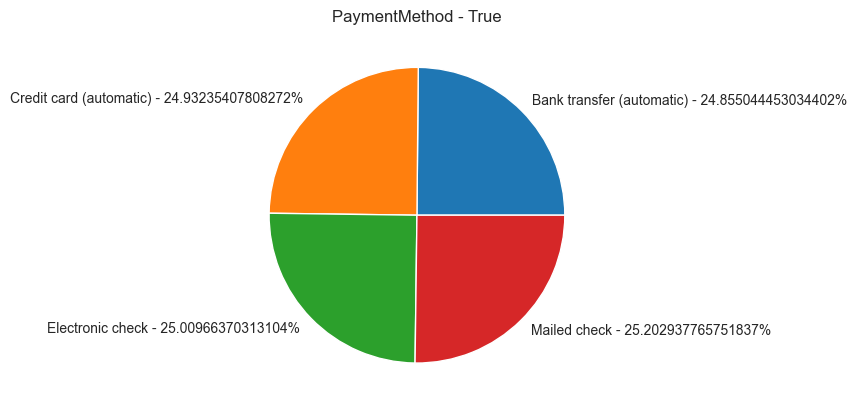

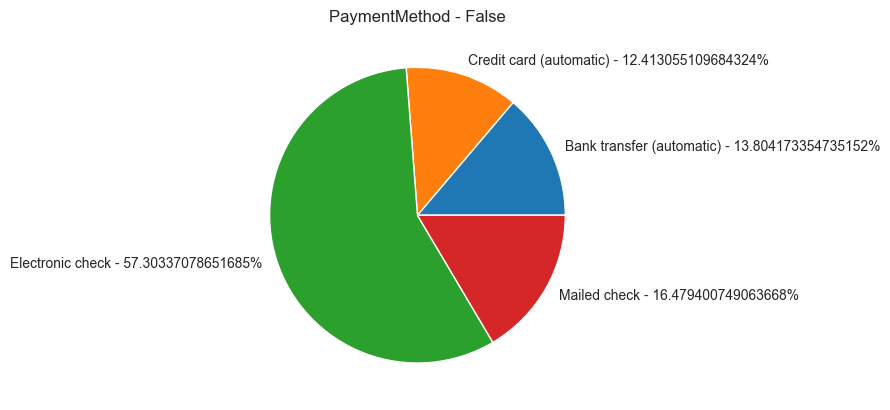

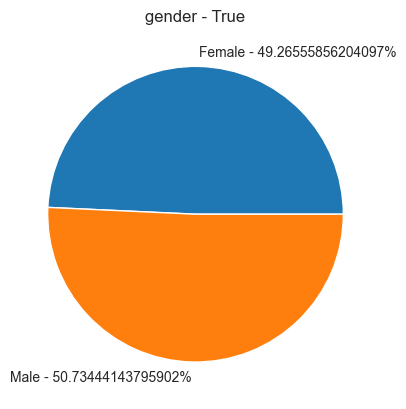

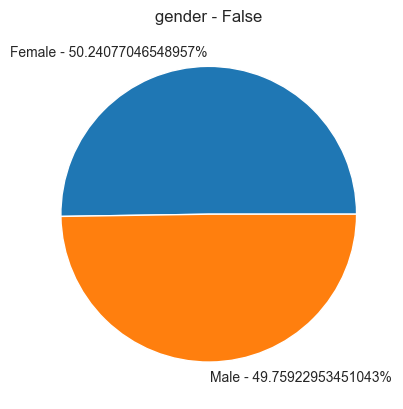

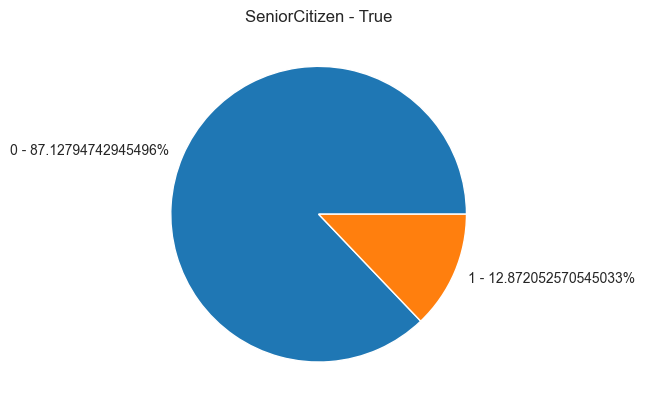

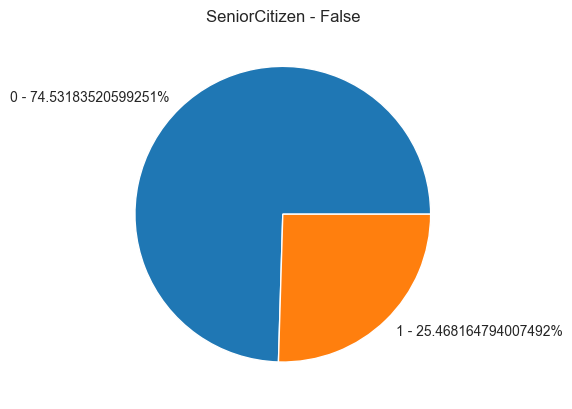

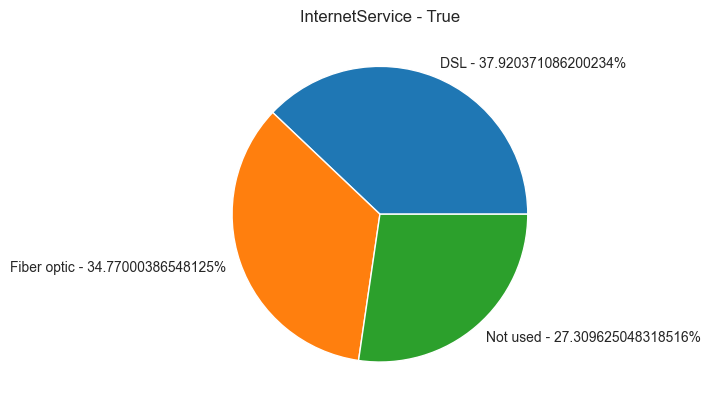

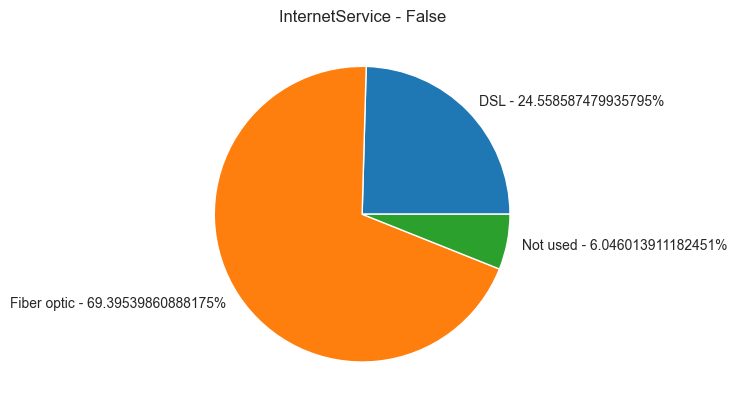

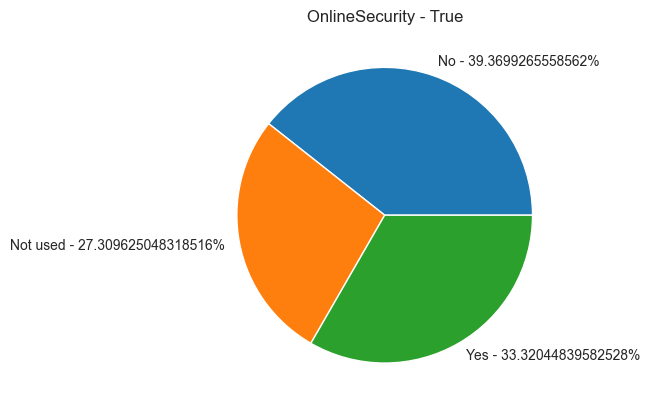

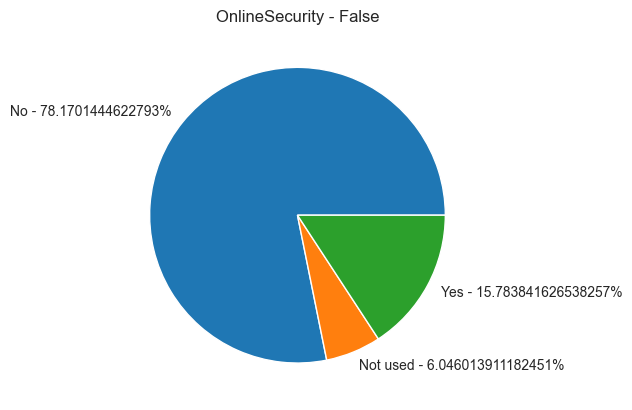

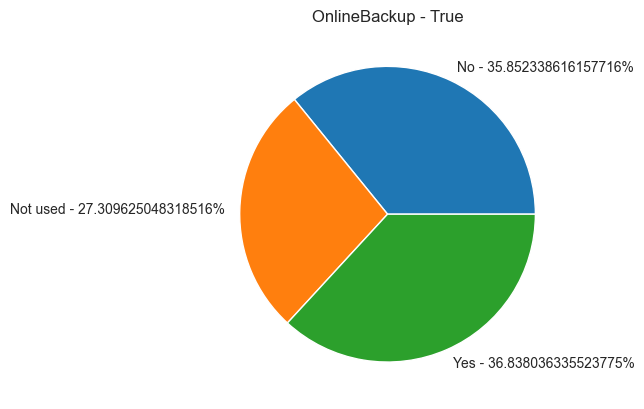

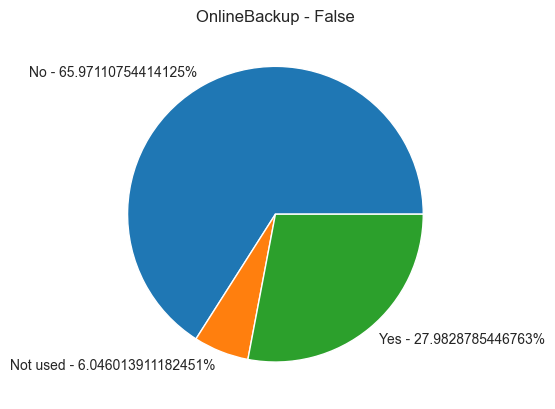

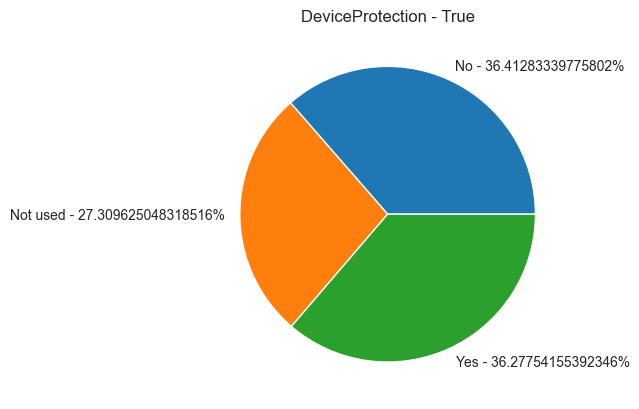

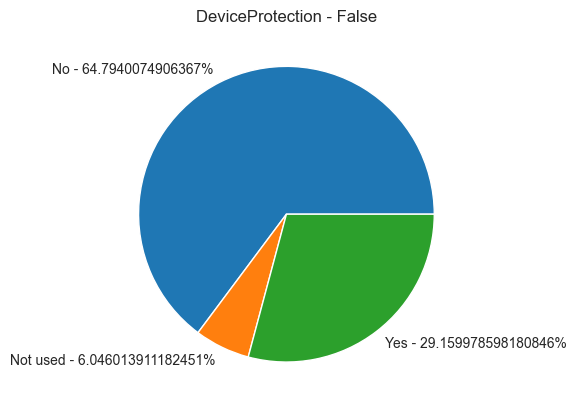

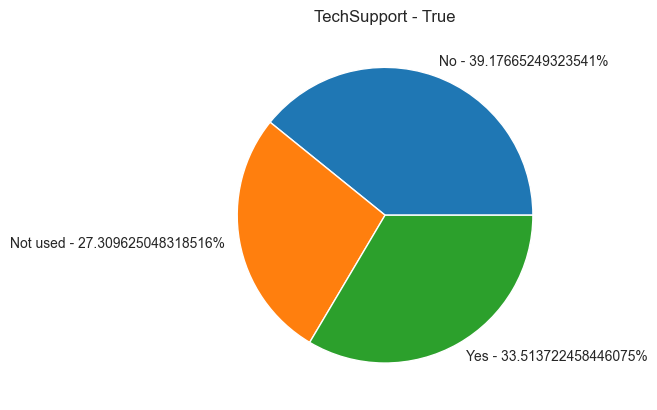

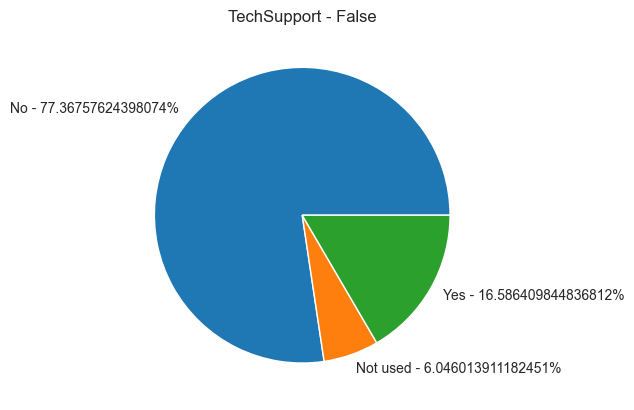

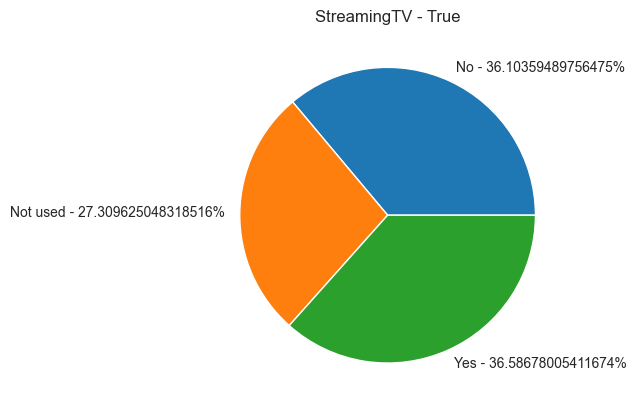

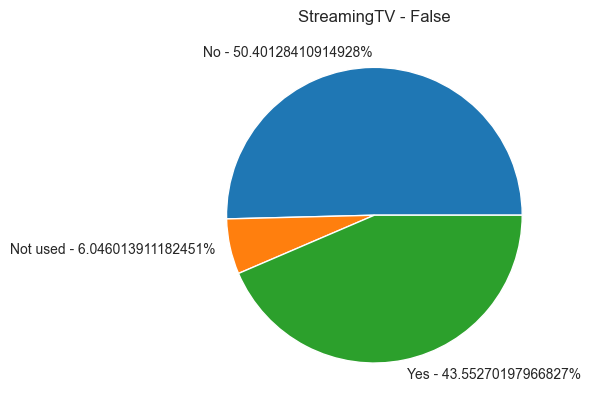

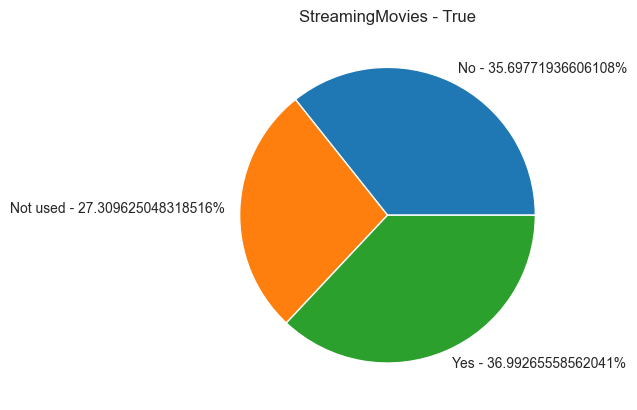

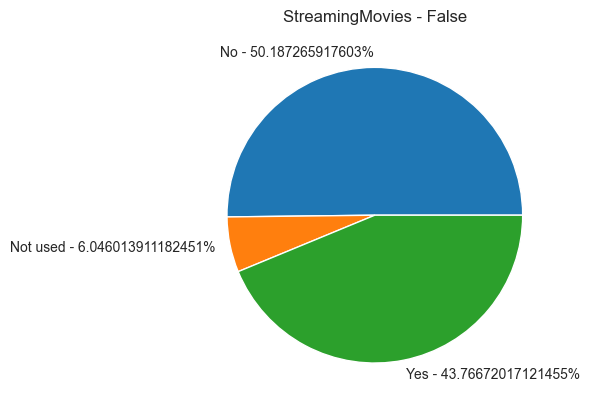

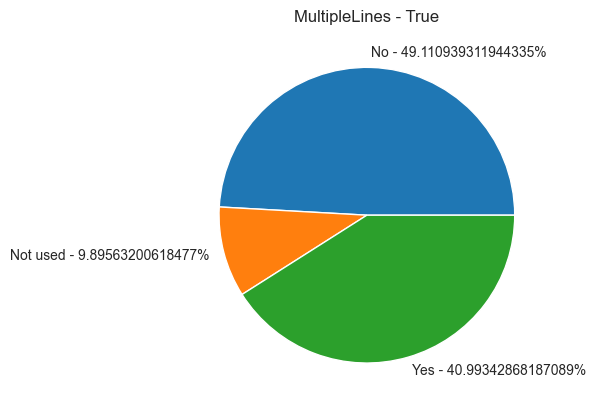

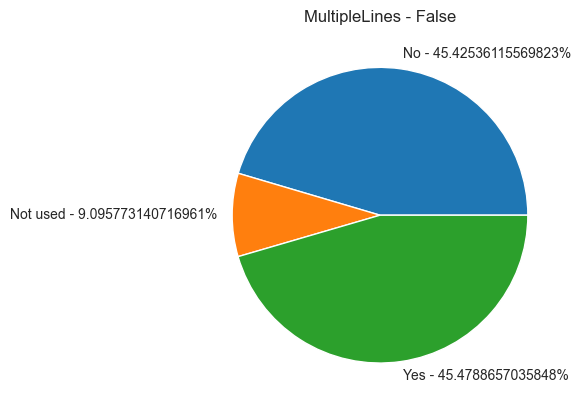

In [58]:
for criteria in [
    'PaymentMethod',
    'gender',
    'SeniorCitizen',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines']:
    for StillClient in [True, False]:
        grouping = full_data[full_data['StillClient']==StillClient].groupby(criteria).count()['customerID']
        values = []
        names = []
        for index in grouping.index:
            percentage = (grouping[index]/grouping.sum())*100
            values.append(percentage)
            names.append(f'{index} - {percentage}%')

        plt.pie(values, labels=names)
        plt.title(f'{criteria} - {StillClient}')
        plt.show()


Поля gender, StreamingTV, StreamingMovies, MultipleLines слабо отличаются среди клиентов и бывших клиентов. Поле customerID также не имеет значения. Уберу их, чтобы модель быстрее обучалась.


Также стоит отметить, что клиенты, которые подключают дополнительные услуги, реже уходят. Возможно стоит более активно их предлагать новым клиентам.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2 ✔️</b>
       
Неплохие решения и предложения!
    
</div>


In [59]:
full_data = (full_data.drop('gender', 'columns')
             .drop('StreamingTV', 'columns')
             .drop('StreamingMovies', 'columns')
             .drop('MultipleLines', 'columns')
             .drop('customerID', 'columns'))

C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\3249909882.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('gender', 'columns')
C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\3249909882.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('gender', 'columns')
C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\3249909882.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('gender', 'columns')
C:\Users\skrip\AppData\Local\Temp\ipykernel_25356\3249909882.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_data = (full_data.drop('gender', 'columns')


Подготовлю данные для подачи модели обучения.

In [60]:
features = full_data.drop('StillClient', axis=1)
target = full_data['StillClient']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=SEED)

Cтандартизирую численные значения

In [61]:
num_columns = []
for column in full_data.columns:
    if full_data[column].dtype =='float64' or full_data[column].dtype =='int64':
        num_columns += [column]
scaler = StandardScaler()
scaler.fit(features_train[num_columns])
features_train[num_columns] = scaler.transform(features_train[num_columns])
features_valid[num_columns] = scaler.transform(features_valid[num_columns])

# Подготовка модели

In [62]:
model_stats = {}

## LogisticRegression

Для начала закодирую данные методикой OHE

In [63]:
features_train_lr = features_train.copy()
features_valid_lr = features_valid.copy()

In [64]:
cat_features = features_train_lr.select_dtypes(include='object').columns.to_list()
print(cat_features)

['Type', 'PaymentMethod', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


In [65]:
# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
# задаём handle_unknown='ignore':
# игнорируется ранее невстречающиеся значения признака (при transform)
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train_lr[cat_features])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train_lr[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[cat_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train_ohe = features_train_lr.drop(cat_features, axis=1)

# смотрим на результат
features_train_ohe.head()

C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MonthlyCharges  TotalCharges  SeniorCitizen  ContractDays  \
852        -1.333294     -0.987515      -0.432396     -1.243661   
6820        0.947475      1.365934      -0.432396      1.077134   
135        -1.304993     -0.489730      -0.432396      0.424744   
4276       -0.509221     -0.964222      -0.432396     -1.244998   
3308       -1.321641     -0.843466      -0.432396     -0.715600   

      Type_One year  Type_Two year  PaymentMethod_Credit card (automatic)  \
852             0.0            0.0                                    0.0   
6820            0.0            0.0                                    0.0   
135             0.0            1.0                                    1.0   
4276            0.0            0.0                                    0.0   
3308            0.0            1.0                                    0.0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  Partner_Yes  \
852                              0.0                         1.0          0.0   
6820                             1.0                         0.0          1.0   
135                              0.0                         0.0          0.0   
4276                             0.0                         1.0          0.0   
3308                             0.0                         1.0          1.0   

      ...  InternetService_Fiber optic  InternetService_Not used  \
852   ...                          0.0                       1.0   
6820  ...                          1.0                       0.0   
135   ...                          0.0                       1.0   
4276  ...                          0.0                       0.0   
3308  ...                          0.0                       1.0   

      OnlineSecurity_Not used  OnlineSecurity_Yes  OnlineBackup_Not used  \
852                       1.0                 0.0                    1.0   
6820                      0.0                 0.0                    0.0   
135                       1.0                 0.0                    1.0   
4276                      0.0                 0.0                    0.0   
3308                      1.0                 0.0                    1.0   

      OnlineBackup_Yes  DeviceProtection_Not used  DeviceProtection_Yes  \
852                0.0                        1.0                   0.0   
6820               0.0                        0.0                   1.0   
135                0.0                        1.0                   0.0   
4276               1.0                        0.0                   0.0   
3308               0.0                        1.0                   0.0   

      TechSupport_Not used  TechSupport_Yes  
852                    1.0              0.0  
6820                   0.0              1.0  
135                    1.0              0.0  
4276                   0.0              0.0  
3308                   1.0              0.0  

[5 rows x 21 columns]



<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий тимлида V2 ❌</b>
       
Если используешь get_dummies для кодирования то надо проверить после кодирования соответствуют ли получившиеся признаки друг другу в двух этих выборках. Дело в том, что этот инструмент не создан для кодирования под машинное обучение)  
    
----  
    
Я бы рекомендовал отвыкать от использования pd.get_dummies, этот инструмент всегда рано или поздно приводит к ошибкам, лучше взять OHE из склерна, более гибкие настройки позволяют избежать ошибок, а также он специально создан под кодирование для машинного обучения) Ниже дам еще ссылочку на блокнот который мы подготовили с подсказками по кодированию
    
----  
    
Ссылка: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html  
Блокнот: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
    
</div>

<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
Понял, спасибо! Переделал по образцу из вашего блокнота.
    
</div>


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2.2 ✔️</b>
       
Здорово!)
    
</div>



In [66]:
%%time

parameters = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'penalty':['l1', 'l2', 'elasticnet'], 
    'n_jobs': [-1]}

estimator = LogisticRegression(random_state=SEED)
model = GridSearchCV(
    estimator,
    parameters,
    cv=5,
    scoring='roc_auc',
    verbose=1)
model.fit(features_train_ohe, target_train)

print('Best score:', model.best_score_)
print(model.best_params_)
model_stats['LogisticRegression'] = model.best_score_

best_model = model.best_estimator_
# predict_valid = best_model.predict(features_valid_ohe)
# print('ROC-AUC validation:', roc_auc_score(target_valid, predict_valid))
# print('Confusion matrix:\n', confusion_matrix(target_valid, predict_valid))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\si

Best score: 0.8402215533965602
{'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}
CPU times: total: 859 ms
Wall time: 22.2 s


C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\skrip\AppData\Local\Programs\Pytho


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Комментарий тимлида V2 ⚠️</b>
       
random_state у нас константа, лучше сразу в модель передать
    
</div>



<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий тимлида V2 ❌</b>
       
Тестовая выборка может быть использована только для проверки одной лучшей модели
    
</div>

<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
Убрал проверку на тестовой выборке.
    
</div>


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2.2 ✔️</b>
       
Принял!
    
</div>



## DecisionTreeClassifier

Сделаю ordinal encoding

In [67]:
encoder = OrdinalEncoder()

features_train_ordinal = features_train.copy()
features_valid_ordinal = features_valid.copy()

features_train_ordinal[cat_features] = encoder.fit_transform(features_train_ordinal[cat_features])
features_valid_ordinal[cat_features] = encoder.transform(features_valid_ordinal[cat_features])

display(features_train_ordinal.head())

Type  PaymentMethod  MonthlyCharges  TotalCharges  SeniorCitizen  \
852    0.0            3.0       -1.333294     -0.987515      -0.432396   
6820   0.0            2.0        0.947475      1.365934      -0.432396   
135    2.0            1.0       -1.304993     -0.489730      -0.432396   
4276   0.0            3.0       -0.509221     -0.964222      -0.432396   
3308   2.0            3.0       -1.321641     -0.843466      -0.432396   

      Partner  Dependents  InternetService  OnlineSecurity  OnlineBackup  \
852       0.0         0.0              2.0             1.0           1.0   
6820      1.0         0.0              1.0             0.0           0.0   
135       0.0         0.0              2.0             1.0           1.0   
4276      0.0         0.0              0.0             0.0           2.0   
3308      1.0         0.0              2.0             1.0           1.0   

      DeviceProtection  TechSupport  ContractDays  
852                1.0          1.0     -1.243661  
6820               2.0          2.0      1.077134  
135                1.0          1.0      0.424744  
4276               0.0          0.0     -1.244998  
3308               1.0          1.0     -0.715600


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий тимлида V2 ❌</b>
       
1. fit_transform может применяться только к train выборке, все остальные просто transform. Ниже оставлю пример)  
2. Нужно четко указывать признаки которые кодируем, иначе закодируются все)
    
</div>

<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
Спасибо, поправил процесс кодирования.
    
</div>


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий тимлида V2.2 ✔️</b>
       
Молодец!
    
</div>



In [68]:
# #КОД ТИМЛИДА

# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(handle_unknown='ignore')

# cat_columns = ['категориальные', 'признаки']

# features_train_oe = features_train.copy()
# features_test_oe = features_test.copy()

# features_train_oe[cat_columns] = encoder.fit_transform(features_train[cat_columns])
# features_test_oe[cat_columns] = encoder.transform(features_test[cat_columns])

In [69]:
%%time

parameters = {
    'max_depth': [1,2,3,4,5,10,20,40,100],
    'class_weight': ['balanced', None],
    'random_state': [SEED]
}

estimator = DecisionTreeClassifier(random_state=SEED)
model = GridSearchCV(
    estimator,
    parameters,
    cv=5,
    scoring='roc_auc',
    verbose=1)
model.fit(features_train_ordinal, target_train)

print('Best score:', model.best_score_)
print(model.best_params_)
model_stats['DecisionTreeClassifier'] = model.best_score_

best_model = model.best_estimator_
# predict_valid = best_model.predict(features_valid_ordinal)
# print('ROC-AUC validation:', roc_auc_score(target_valid, predict_valid))
# print('Confusion matrix:\n', confusion_matrix(target_valid, predict_valid))
# best_model.feature_importances_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score: 0.8365742512161528
{'class_weight': None, 'max_depth': 5, 'random_state': 261222}
CPU times: total: 1.27 s
Wall time: 1.94 s


<AxesSubplot: >

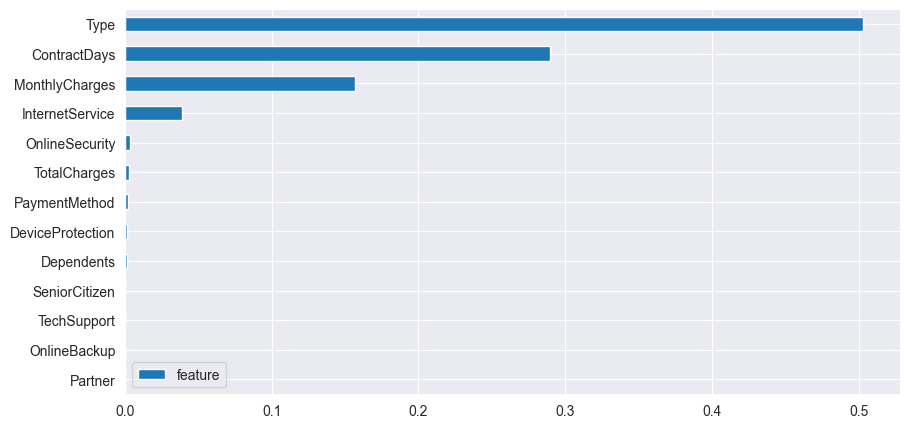

In [70]:
feature_importances = best_model.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, features_train_ordinal.columns, ['feature'])
feature_importances_df = feature_importances_df.sort_values(by='feature')
feature_importances_df.plot(kind='barh',figsize=(10,5))

## RandomForestClassifier

Тут можно использовать кодированные данные для предыдущей модели

In [71]:
%%time

parameters = {
    'n_estimators': range(1, 501, 100), 
    'criterion': ['gini', 'entropy'], 
    'max_depth':range(1, 50, 2),
    'class_weight': ['balanced', None]
}

estimator = RandomForestClassifier(n_jobs=-1,random_state=SEED)
model = GridSearchCV(
    estimator,
    parameters,
    cv=5,
    scoring='roc_auc',
    verbose=1)
model.fit(features_train_ordinal, target_train)

print('Best score:', model.best_score_)
print(model.best_params_)
model_stats['RandomForestClassifier'] = model.best_score_

best_model = model.best_estimator_
# predict_valid = best_model.predict(features_valid_ordinal)
# print('ROC-AUC validation:', roc_auc_score(target_valid, predict_valid))
# print('Confusion matrix:\n', confusion_matrix(target_valid, predict_valid))
# best_model.feature_importances_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best score: 0.8600980792824465
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 401}
CPU times: total: 6min 6s
Wall time: 17min 35s


<AxesSubplot: >

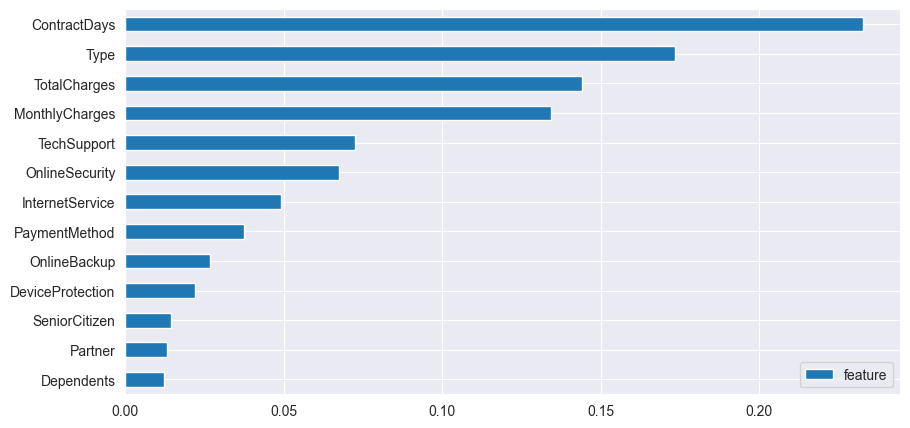

In [72]:
feature_importances = best_model.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, features_train.columns, ['feature'])
feature_importances_df = feature_importances_df.sort_values(by='feature')
feature_importances_df.plot(kind='barh',figsize=(10,5))

## LightGBM

Тут нет необходимости в кодировании, модель сама под себя закодирует данные.

In [73]:
for c in cat_features:
    features_train[c] = features_train[c].astype('category')
    features_valid[c] = features_valid[c].astype('category')

In [74]:
lgb_params = {
    'num_leaves': [10,31,125,200],
    'min_child_samples': [2,20,50],
    'boosting_type': ['gbdt'],
    'colsample_bytree': [.01,.5,.7],
    'max_bin': [145,255,500],
    'max_depth': [-1,40,100,200],
    'num_iterations': [100,210,500],
# Для параметров ниже подбирал значения полувручную,
# т.к. они использовались в первую очередь для борьбы с overfitting'ом,
# при автоподборе выбираются значения, скоторыми лучше результат на кросс-валидации,
# но хуже на валидационной выборке
    'learning_rate': [0.7],
    'reg_alpha': [0.5],
    'reg_lambda': [0.002]}

In [75]:
%%time

print(dt.now())
estimator = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=SEED)
model = GridSearchCV(
    estimator,
    lgb_params,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=6)
model.fit(features_train, target_train)

print('Best score:', model.best_score_)
print(model.best_params_)
model_stats['LGBMClassifier'] = model.best_score_

best_model = model.best_estimator_
predict_valid = best_model.predict(features_valid)
# print('ROC-AUC validation: {0:0.4f}'.format(roc_auc_score(target_valid, predict_valid)))
# print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(target_valid, predict_valid)))

2023-03-22 17:18:26.341883
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best score: 0.9444159026093735
{'boosting_type': 'gbdt', 'colsample_bytree': 0.01, 'learning_rate': 0.7, 'max_bin': 145, 'max_depth': -1, 'min_child_samples': 2, 'num_iterations': 100, 'num_leaves': 125, 'reg_alpha': 0.5, 'reg_lambda': 0.002}
CPU times: total: 19 s
Wall time: 4min 45s


C:\Users\skrip\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


<AxesSubplot: >

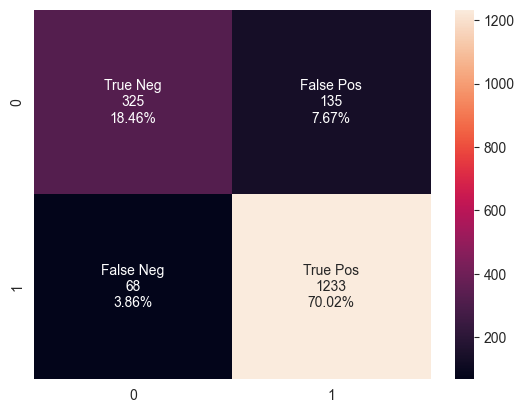

In [76]:
cm = confusion_matrix(target_valid, predict_valid)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

In [77]:
pprint.pprint(model_stats)

{'DecisionTreeClassifier': 0.8365742512161528,
 'LGBMClassifier': 0.9444159026093735,
 'LogisticRegression': 0.8402215533965602,
 'RandomForestClassifier': 0.8600980792824465}


Самый высокий ROC-AUC у LGBMClassifier, проверю эту модель на валидационной выборке.

In [78]:
predict_proba_valid = best_model.predict_proba(features_valid)[:,1]
predict_valid = best_model.predict(features_valid)

print('ROC-AUC validation: {0:0.4f}'.format(roc_auc_score(target_valid, predict_proba_valid)))
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(target_valid, predict_valid)))

ROC-AUC validation: 0.9335
Training-set accuracy score: 0.885


<AxesSubplot: >

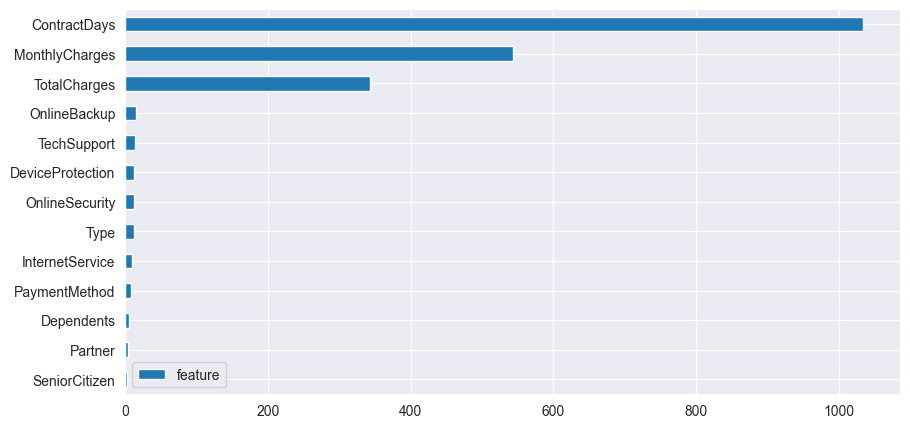

In [79]:
feature_importances = best_model.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, features_train.columns, ['feature'])
feature_importances_df = feature_importances_df.sort_values(by='feature')
feature_importances_df.plot(kind='barh',figsize=(10,5))


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий тимлида V2 ❌</b>
       
У всех моделей одна и та же проблема, а именно использование тестовой выборки. Нам надо получить метрику для всех моделей на кросс-валидации и на основе этой метрики выбрать лучшую модель. После чего одна лучшая модель проверяется на тестовой выборке) Также предсказание для метрики ROC AUC следует делать через predict_proba
    
</div>


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Комментарий тимлида V2 ⚠️</b>
       
Отчет сдается на следующем шаге)
    
</div>



<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий тимлида V2 ⚠️</b>
       
У тебя получился неплохой проект, но некоторые моменты следует доработать, все отметил по ходу работы) Буду ждать на повторную проверку!
    
</div>


<div class="alert alert-block alert-info"; style="border-left: 6px solid blue">
<b>Комментарий студента V2</b>
       
Спасибо за советы! Все замечания, вроде, поправил.
    
</div>


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий тимлида V2.2 ✔️</b>
       
Отличные доработки, теперь все супер! Принимаю самую объемную часть работы) Вижу ниже отчет, пока не смотрю, пришли мне эту тетрадку с отчетом в следующем шаге на платформе, чтобы система могла тебя выпустить)
    
</div>


# Отчет

1. Провел предобработку данных. В дополнение к запланированным объедиения и изменения типов колонок сделал стандартизацию численных значений

2. На основе дополнительного исследовательского анализа удалил колонки, значения которых не сильно отличались между теми кто ушел и остался, либо их суть дублировалась в значениях других колонок:
        BeginDate
        EndDate
        PaperlessBilling
        gender
        StreamingTV
        StreamingMovies
        MultipleLines
        customerID

3. Выделил валидаионную выборку для проверки обученной модели.

4. Для LogisticRegression закодировал данные в OHE, для DecisionTree и RandomForest в OrdinalEncoding, LGBM сам все закодировал, но я привел текстовые колонки к категориальным.

5. После первых тестов самый лучший результат показала LGBM, которую я в дальнейшем смог привести к точности ROC-AUC 94.4% на кросс-валидации и 93.4% на валидационной выборке. Самые лучшие гиперпараметры, которые я смог подобрать:
        'num_leaves': [10,31,125,200],
        'min_child_samples': [2,20,50],
        'boosting_type': ['gbdt'],
        'colsample_bytree': [.01,.5,.7],
        'max_bin': [145,255,500],
        'max_depth': [-1,40,100,200],
        'num_iterations': [100,210,500],
        'learning_rate': [0.7],
        'reg_alpha': [0.5],
        'reg_lambda': [0.002]
    
6. Также графики feature importance показывают, что LGBM в основно опирается только на ContractDays, MonthlyCharges и TotalCharges. Этот график выглядит намного более сбалансированным у RandomForestClassifier. При больших сроках, стоило бы попробовать более точно подобрать параметры для этой модели, несмотря на менее точный изначальный результат.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий тимлида V3 ✔️</b>
       
Как я говорил на созвоне, хороший отчет - это отчет по которому можно понять что происходило в проекте без заглядывания в код. У тебя получился ровно такой отчет, очень все подробно и без лишней воды, молодец! Принимаю финальный этап работы, а это значит, что тебя можно поздравлять с завершением курса) Это был долгий путь и ты со всем справился, поздравляю! Финальные слова и поздравления я еще скажу на нашем последнем созвоне, а пока что можно чуть-чуть отдохнуть)  
    
----  
    
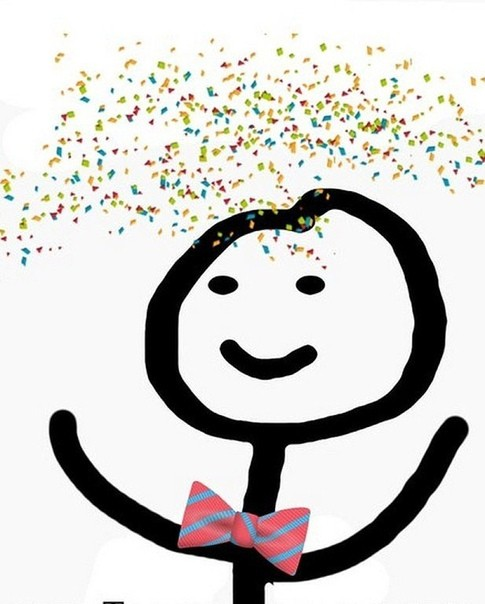
    
</div>